# Attractor Network model

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2


#helper functions
def activation_fun(I):
    if I <= 0: I = 0
    return I

def activation_sigm(I):
    y = (1 + np.tanh(I))/2
    return y

def activation_vec(vec, y):
    vfunc = np.vectorize(y)
    return vfunc(vec)

#Euler formula used
def dI_dt(I, W, y, E): return ( np.dot(W, y) - I + E)/tau

#Model of Activation Network given in the exercise
def ActivationNetwork(time_vec, w, v, E, activation_f):
    W = np.matrix([[w, v], [v, w]])
    N = len(time_vec)

    Y1 = np.zeros_like(time_vec)
    Y2 = np.zeros_like(time_vec)
    Y = np.zeros([2,N])
    I = np.zeros([2,N])
    I[0,0] = 2
    I[1,0] = 0
    Y[:,0] = activation_vec(I[:,0], activation_f)
    Y1[0] = Y[0,0]
    Y2[0] = Y[1,0]

    for t in range(0, N-1):
        I[:,t+1] = I[:,t] + dI_dt(I[:,t],W, Y[:,t], E[t]) * dt
        Y[:,t+1] = activation_vec(I[:,t+1], activation_f)
        Y1[t+1] = Y[0,t+1]
        Y2[t+1] = Y[1,t+1]
    return Y1, Y2, I

## Exercise 1 
Determin the connectivity matrix and simulating the system without external input for:
a) w = 0.2, v = 0.8 
b) w = 0.2, v = 0.7 

Frist setting up constans and input vector:

Text(0.5,1,'Attractor Network w=0.2, v=0.8')

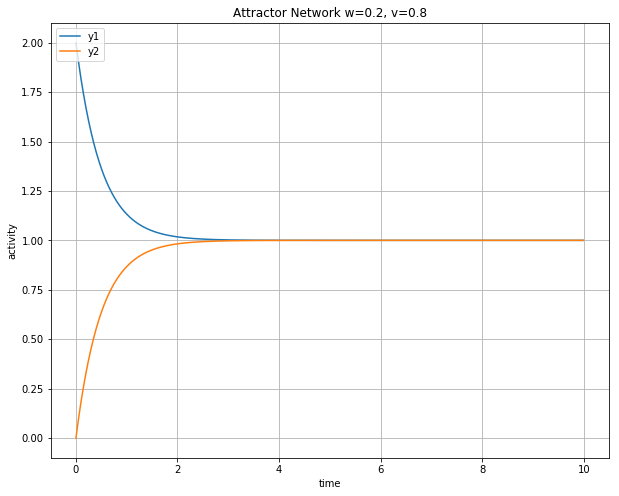

In [2]:
tau = 0.2
dt = 0.01
t_end = 10
time_vec = np.arange(0, t_end, dt)

##EX 1a
w = 0.8
v = 0.2
E = np.zeros_like(time_vec)
Y1, Y2, I = ActivationNetwork(time_vec, w, v, E, activation_fun)

#plots
fig, axes = plt.subplots()
axes.grid(True)
axes.plot(time_vec, Y1, label="y1")
axes.plot(time_vec, Y2, label="y2")
axes.legend(loc=2)
axes.set_ylabel('activity')
axes.set_xlabel("time")
axes.set_title("Attractor Network w=0.2, v=0.8")

Text(0.5,1,'Attractor Network w=0.2, v=0.7')

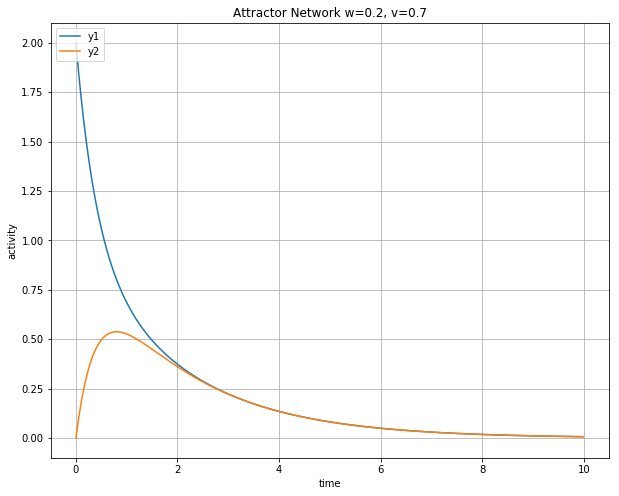

In [3]:
##EX 1b
w = 0.7
v = 0.2
E = np.zeros_like(time_vec)
Y1, Y2, I = ActivationNetwork(time_vec, w, v, E, activation_fun)

#plots
fig, axes = plt.subplots()
axes.grid(True)
axes.plot(time_vec, Y1, label="y1")
axes.plot(time_vec, Y2, label="y2")
axes.legend(loc=2)
axes.set_ylabel('activity')
axes.set_xlabel("time")
axes.set_title("Attractor Network w=0.2, v=0.7")


## Exercise 2
External input added to the system and two sets simulated
Which functions that system implement for w=0.2, v=0.8?

Text(0.5,1,'Attractor Network with external input, w=0.2, v=0.8')

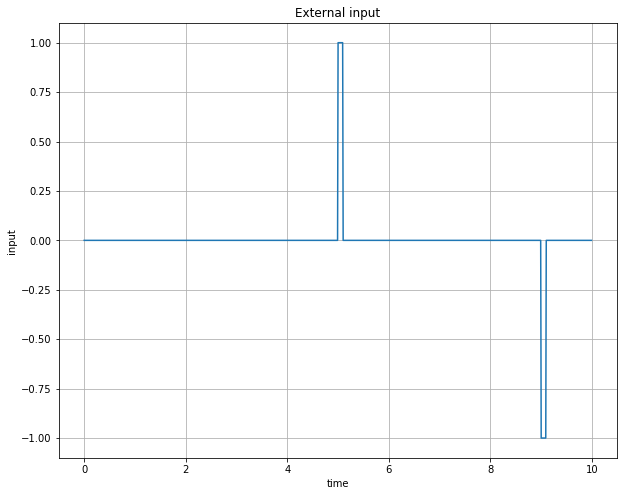

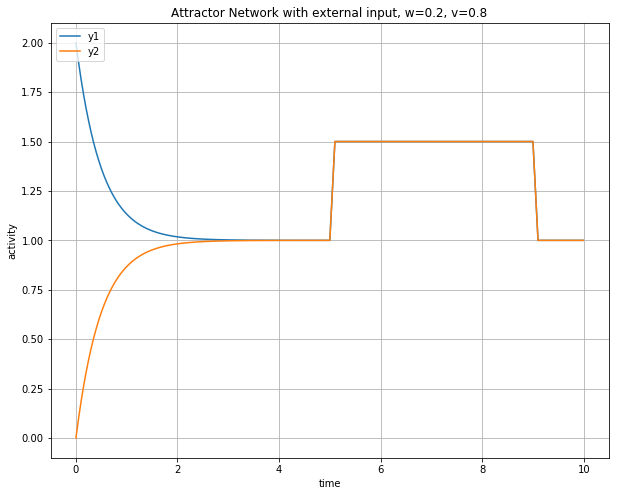

In [4]:
#setting up external input
E = np.zeros_like(time_vec)
E[500:510] = 1
E[900:910] =-1

fig, axes = plt.subplots()
axes.grid(True)
axes.plot(time_vec, E)
axes.set_ylabel('input')
axes.set_xlabel("time")
axes.set_title("External input")

##EX 2a
w = 0.8
v = 0.2
Y1, Y2, I = ActivationNetwork(time_vec, w, v, E, activation_fun)

fig, axes = plt.subplots()
axes.grid(True)
axes.plot(time_vec, Y1, label="y1")
axes.plot(time_vec, Y2, label="y2")
axes.legend(loc=2)
axes.set_ylabel('activity')
axes.set_xlabel("time")
axes.set_title("Attractor Network with external input, w=0.2, v=0.8")

Text(0.5,1,'Attractor Network with external input, w=0.2, v=0.7')

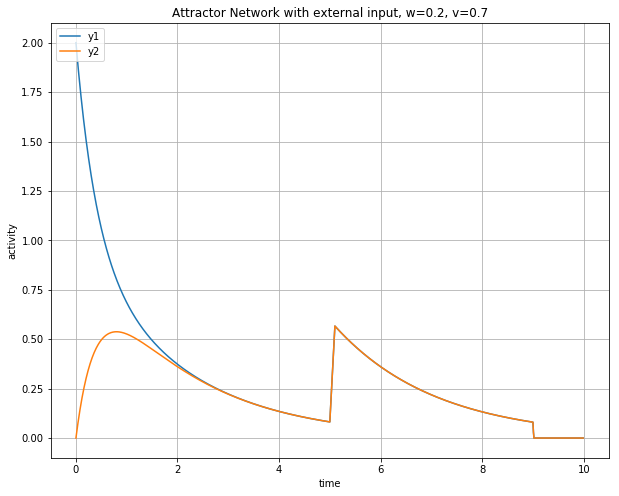

In [5]:
##EX 2b
w = 0.7
v = 0.2
Y1, Y2, I = ActivationNetwork(time_vec, w, v, E, activation_fun)

fig, axes = plt.subplots()
axes.grid(True)
axes.plot(time_vec, Y1, label="y1")
axes.plot(time_vec, Y2, label="y2")
axes.legend(loc=2)
axes.set_ylabel('activity')
axes.set_xlabel("time")
axes.set_title("Attractor Network with external input, w=0.2, v=0.7")

## Exercise 3
Modification of actiavation function to a smoth sigmoid
y = (1 + tanh(I))/2
Does this change system's behaviour?

Text(0.5,1,'Attractor Network with smooth sigmoid, w=0.2, v=0.8')

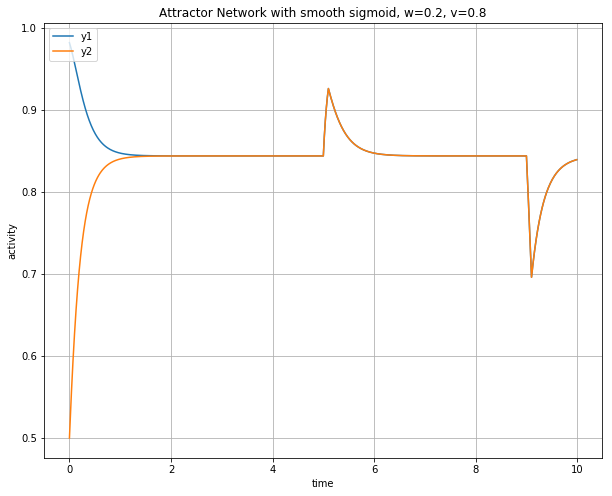

In [6]:
#EX3a
w = 0.8
v = 0.2
Y1, Y2, I = ActivationNetwork(time_vec, w, v, E, activation_sigm)

#plots
fig, axes = plt.subplots()
axes.grid(True)
axes.plot(time_vec, Y1, label="y1")
axes.plot(time_vec, Y2, label="y2")
axes.legend(loc=2)
axes.set_ylabel('activity')
axes.set_xlabel("time")
axes.set_title("Attractor Network with smooth sigmoid, w=0.2, v=0.8")

Text(0.5,1,'Attractor Network with smooth sigmoid, w=0.2, v=0.7')

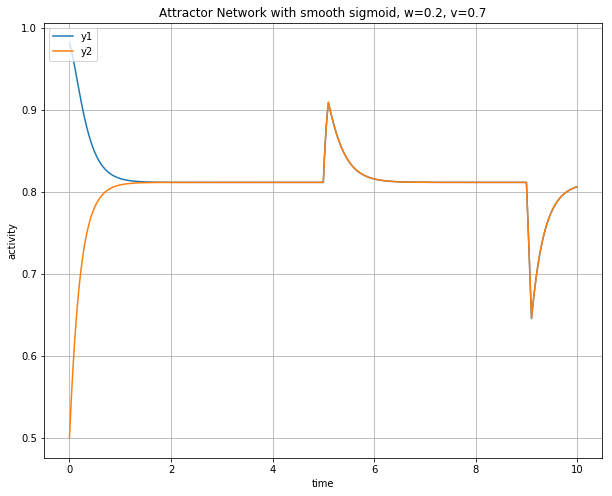

In [7]:
#EX3a
w = 0.7
v = 0.2
Y1, Y2, I = ActivationNetwork(time_vec, w, v, E, activation_sigm)

#plots
fig, axes = plt.subplots()
axes.grid(True)
axes.plot(time_vec, Y1, label="y1")
axes.plot(time_vec, Y2, label="y2")
axes.legend(loc=2)
axes.set_ylabel('activity')
axes.set_xlabel("time")
axes.set_title("Attractor Network with smooth sigmoid, w=0.2, v=0.7")